## Final Project Submission

Please fill out:
* Student name: Harry Atulah
* Student pace: full time
* Scheduled project review date/time: June 7th
* Instructor name: Maryann Mwikali

In [1]:
pip install --upgrade scikit-learn imbalanced-learn

Requirement already up-to-date: scikit-learn in c:\users\harry\anaconda3\envs\learn-env\lib\site-packages (1.3.2)
Requirement already up-to-date: imbalanced-learn in c:\users\harry\anaconda3\envs\learn-env\lib\site-packages (0.12.3)
Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay

In [3]:
warnings.filterwarnings('ignore')

### Loading Dataset

In [4]:
df = pd.read_csv('customer_churn.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
# Checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Descritive analysis
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data Cleaning

In [8]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset

In [9]:
# Checking for duplicates
duplicates_with_rows = df[df.duplicated()]
duplicates_with_rows

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


No duplicates

In [10]:
# Dropping phone number column
df = df.drop('phone number', axis=1)

Dropping unnecessary columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### EDA

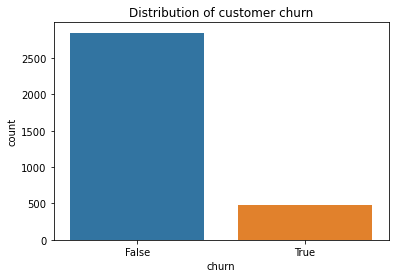

In [11]:
# Visualizing the distribution of the target variable (Churn)
sns.countplot(data=df, x='churn')
plt.title('Distribution of customer churn')
plt.show()

The countplot visualizes the distribution of the target variable "Churn" in the SyriaTel Customer Churn dataset. The plot shows the number of customers who churned (denoted by 'True') and those who did not churn (denoted by 'False'). From the graph, it's evident that the dataset contains more instances of customers who did not churn compared to those who churned. This indicates an imbalance in the dataset.

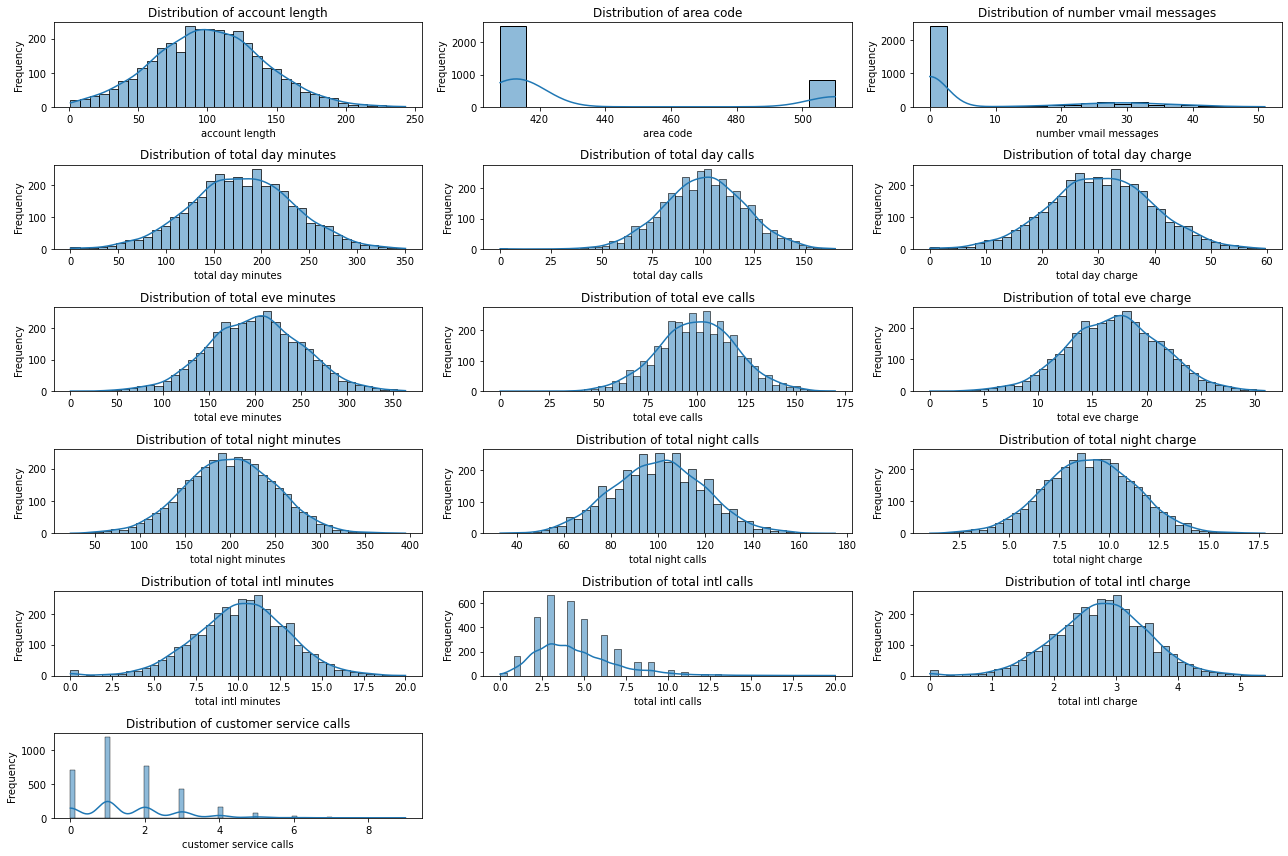

In [12]:
# Determining the number of rows and columns for subplots
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Visualizing the distribution of numerical features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Each histogram provides insights into the distribution of a particular numerical feature, showing the frequency of values along the x-axis and the corresponding frequency density along the y-axis. This visualization helps in understanding the range, central tendency, and spread of each numerical feature in the dataset.

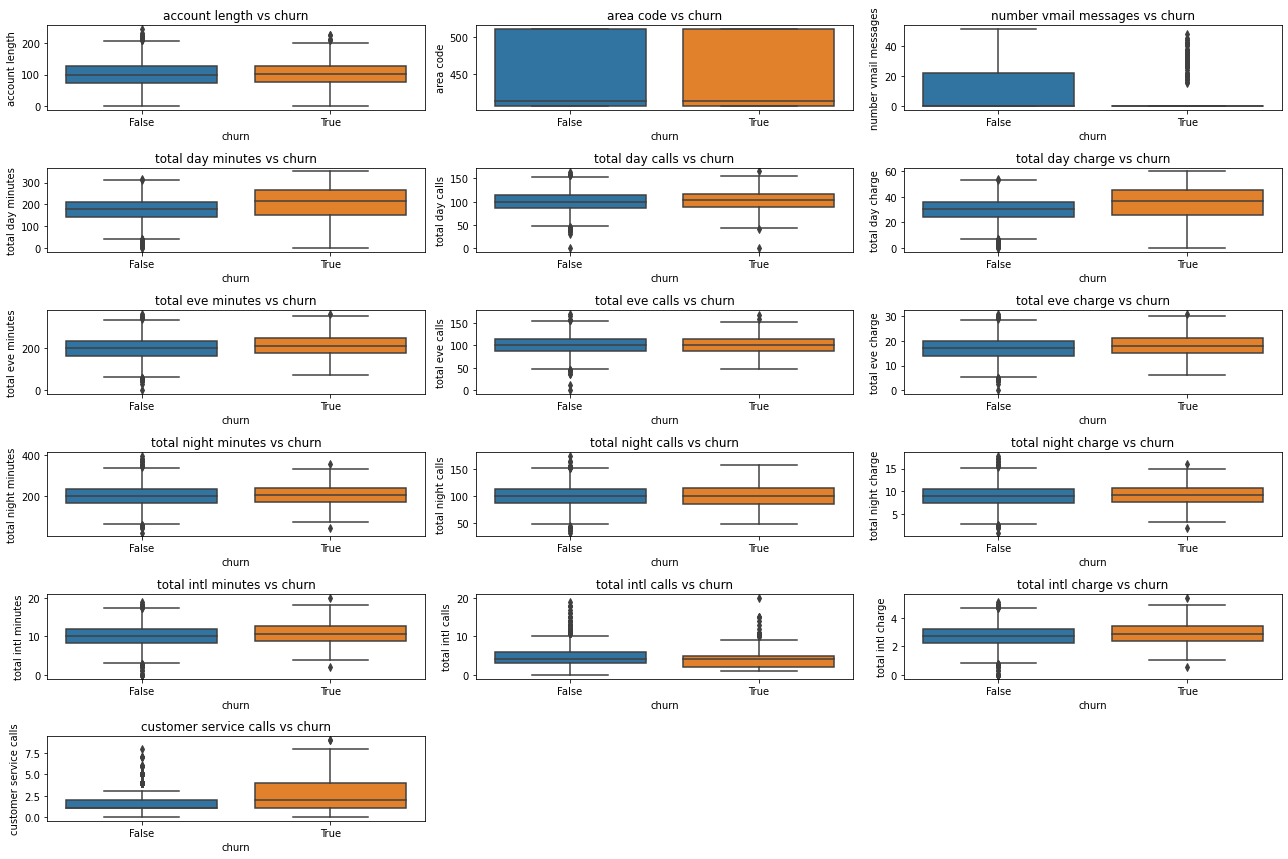

In [13]:
# Analyzing the relationship between numerical features and the target variable
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} vs churn')
    plt.xlabel('churn')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


The plot visualizes the relationship between numerical features and the target variable 'churn' using boxplots. Each subplot represents a different numerical feature, and the boxplot illustrates the distribution of that feature's values across the two categories of the target variable: churn and non-churn. The x-axis denotes the target variable (churn), and the y-axis represents the values of the numerical feature. The boxplot shows the distribution of the feature's values within each category of the target variable, including the median (line inside the box), interquartile range (box), and outliers (points beyond the whiskers). By comparing the boxplots across different numerical features, we can identify potential relationships or differences in the distributions of these features between churn and non-churn groups, which can provide insights into the predictive power of these features for determining churn.

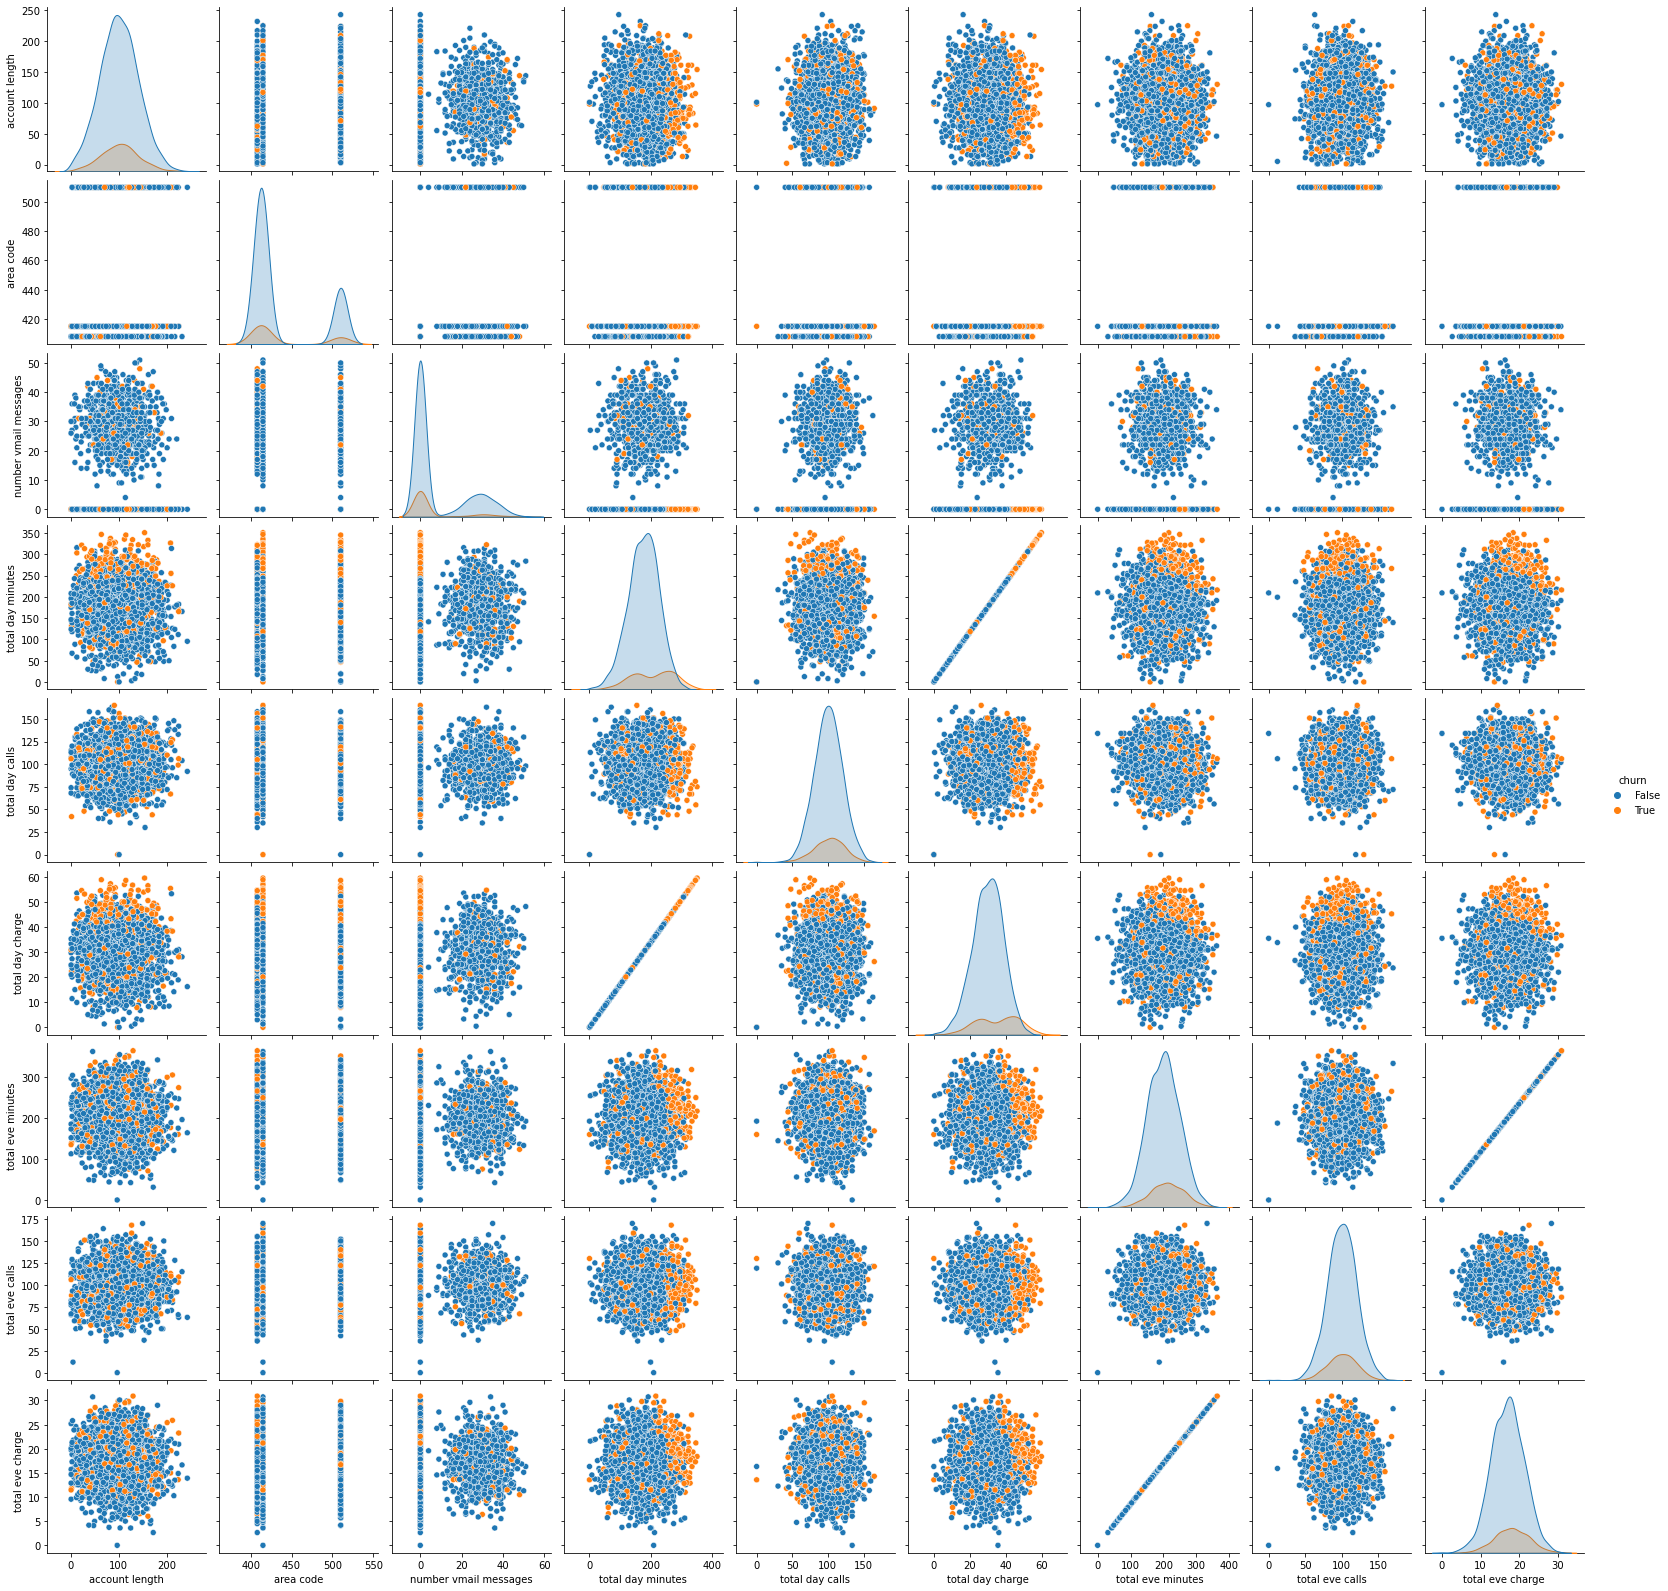

In [14]:
#Pairplot
sns.pairplot(df, hue='churn', vars=['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge'])
plt.show()

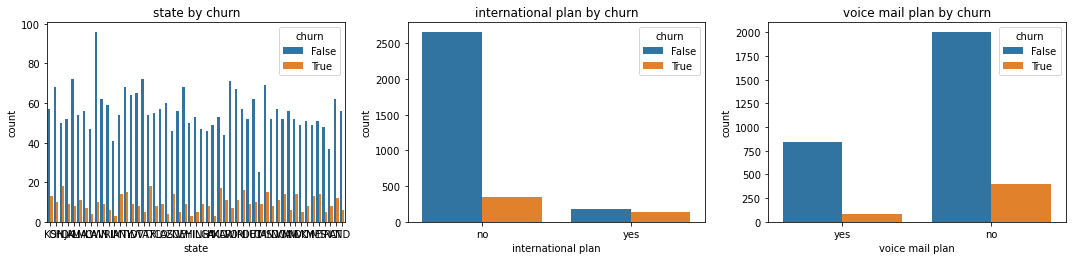

In [15]:
# Distribution of Categorical features
def plot_countplots_with_attrition(df, categorical_columns):

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='churn', data=df)
        plt.title(f'{col} by churn')
    plt.tight_layout()
    plt.show()

# categorical features to the plot
categorical_columns = ['state', 'international plan', 'voice mail plan']
plot_countplots_with_attrition(df, categorical_columns)

The aforementioned illustrates how categorical attributes, such as state, international plan, and voice mail plan, differ throughout the evaluation variable.

### One Hot Encoding

In [18]:
# Categorical columns
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']
# One-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Convert boolean columns to binary
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,0,0


### Modelling

#### Splitting the Dataset

In [20]:
X = df.drop('churn_True', axis=1)
y = df['churn_True']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [21]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Results
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       566
           1       0.50      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.68      0.52      0.50       667
weighted avg       0.80      0.85      0.79       667

Confusion Matrix:
 [[561   5]
 [ 96   5]]


The Logistic Regression model achieved an accuracy of 85.5% in its predictions. In the classification report, the model demonstrated good precision of 87% for the "False" class but relatively lower recall of 97%, resulting in an F1-score of 92%. However, its performance on the "True" class was weaker, with a precision of 56% and a low recall of 19%, leading to an F1-score of 28%. The confusion matrix indicates that the model correctly classified 551 instances of the "False" class but misclassified 15 instances, while for the "True" class, it correctly classified 19 instances but misclassified 82. 

### Feature Importance

In [22]:
feature_importance = log_reg.coef_[0]

# displaying feature names on dataframe
feature_names = X.columns  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# top most important features
top_n = 10 
print("Top {} most important features:".format(top_n))
print(feature_importance_df.head(top_n))

Top 10 most important features:
                   Feature  Coefficient
15  customer service calls     0.464278
66  international plan_yes     0.219129
12      total intl minutes     0.044701
58                state_TX     0.021377
46                state_NJ     0.016515
55                state_SC     0.015928
48                state_NV     0.015269
17                state_AR     0.012843
14       total intl charge     0.012088
36                state_ME     0.010960


### Decision Trees

In [23]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))



Decision Tree Results
Accuracy: 0.9295352323838081
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.79      0.73      0.76       101

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[546  20]
 [ 27  74]]


The decision tree model achieved an accuracy of 94.3% in predicting the target variable. The classification report indicates that the model performed well in classifying the "False" class, with a precision of 95% and recall of 98%, resulting in an F1-score of 97%. However, it showed slightly weaker performance in classifying the "True" class, with a precision of 88% and recall of 72%, leading to an F1-score of 79%. The confusion matrix illustrates that the model correctly classified 556 instances of the "False" class but misclassified 10 instances, while for the "True" class, it correctly classified 73 instances but misclassified 28.

### Feature Importance

In [24]:
feature_importance = tree_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
3        total day minutes    0.201534
15  customer service calls    0.109389
8         total eve charge    0.099795
12      total intl minutes    0.081715
66  international plan_yes    0.078900
..                     ...         ...
37                state_MI    0.000000
48                state_NV    0.000000
39                state_MO    0.000000
45                state_NH    0.000000
43                state_ND    0.000000

[68 rows x 2 columns]


### Random Forest

In [26]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Results
Accuracy: 0.9385307346326837
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.95      0.62      0.75       101

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix:
 [[563   3]
 [ 38  63]]


The Random Forest model attained an accuracy of 89.8% in its predictions. The classification report reveals that the model performed well in classifying the "False" class, with a precision of 89% and perfect recall of 100%, leading to an F1-score of 94%. However, it displayed weaker performance in classifying the "True" class, with a precision of 97% but a relatively lower recall of 34%, resulting in an F1-score of 50%. The confusion matrix demonstrates that the model correctly classified 565 instances of the "False" class but misclassified one instance, while for the "True" class, it correctly classified 34 instances but misclassified 67. Overall, the model exhibits strong predictive capabilities for the "False" class but may require refinement to improve its performance on the "True" class, as we will use SMOTE method to improve that.

### Feature Importance

In [27]:
feature_importance = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
5         total day charge    0.127016
3        total day minutes    0.114494
15  customer service calls    0.108277
66  international plan_yes    0.064756
8         total eve charge    0.061193
..                     ...         ...
43                state_ND    0.000856
26                state_HI    0.000652
39                state_MO    0.000560
27                state_IA    0.000459
45                state_NH    0.000431

[68 rows x 2 columns]


### Applying SMOTE

In [28]:
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Spliting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model on the balanced data
rf_clf_smote = RandomForestClassifier(random_state=42)
rf_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_clf_smote.predict(X_test)

# model Evaluation
print("\nRandom Forest with SMOTE Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))



Random Forest with SMOTE Results
Accuracy: 0.9265367316341829
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.76      0.75      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[542  24]
 [ 25  76]]


In [29]:
# Feature Importance
feature_importance = rf_clf_smote.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
15  customer service calls    0.140166
66  international plan_yes    0.117166
5         total day charge    0.087724
3        total day minutes    0.083024
67     voice mail plan_yes    0.058284
..                     ...         ...
25                state_GA    0.000775
57                state_TN    0.000767
39                state_MO    0.000705
27                state_IA    0.000613
45                state_NH    0.000427

[68 rows x 2 columns]


### Hyperparameter Tuning

In [30]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [31]:
# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9418611351195623


In [32]:
# Using the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the best model: 0.9400299850074962

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       0.98      0.61      0.76       101

    accuracy                           0.94       667
   macro avg       0.96      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667



In [33]:
# Feature Importance
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
3        total day minutes    0.124667
5         total day charge    0.123533
15  customer service calls    0.105453
66  international plan_yes    0.067876
8         total eve charge    0.059745
..                     ...         ...
43                state_ND    0.000830
45                state_NH    0.000654
39                state_MO    0.000643
26                state_HI    0.000555
27                state_IA    0.000546

[68 rows x 2 columns]


### Visualizations

#### 1. Confusion Matrix

In [34]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

#### 2. Feature Importance

In [35]:
def plot_feature_importance(model, X_train):
    feature_importance = model.feature_importances_
    features = pd.DataFrame(X_train).columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

#### 3.ROC Curve

In [36]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#### Plot for Logistic Regression

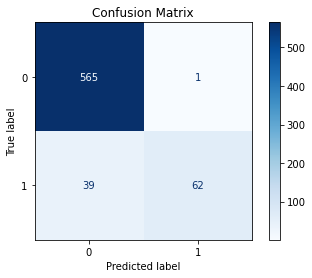

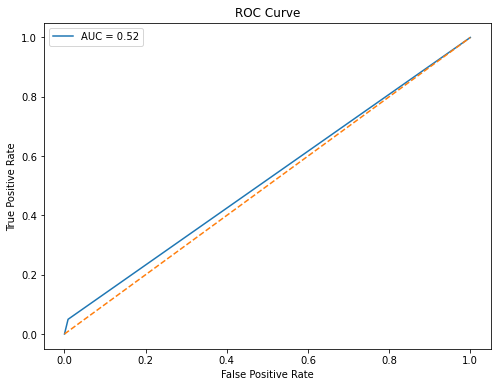

In [38]:
# confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred)
# ROC curve for Logistic regression
y_pred_prob = log_reg.predict_proba(X_test)[:, 1] 
plot_roc_curve(y_test,y_pred_log_reg)

#### Plot for Decision Tree

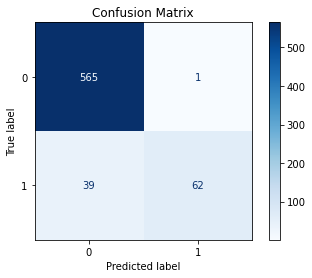

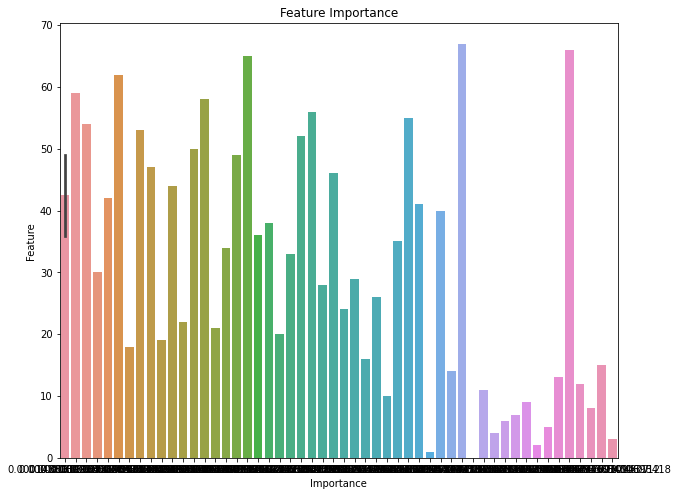

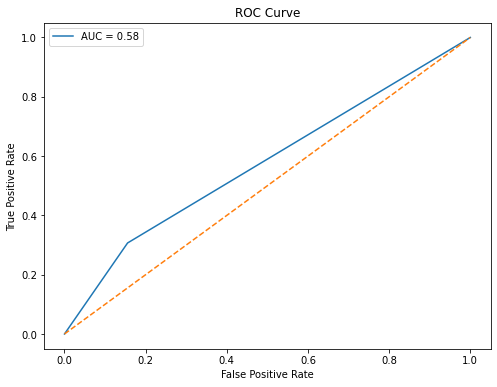

In [40]:
# confusion matrix for Decision Tree Classifier
plot_confusion_matrix(y_test, y_pred)

# feature importance plot 
plot_feature_importance(tree_clf, X_train)

# ROC curve plot
y_pred_prob = tree_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)

#### Plot for Random Forest

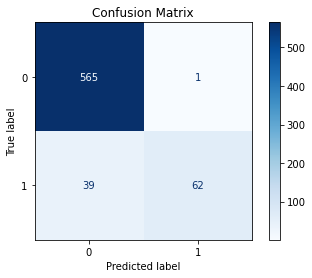

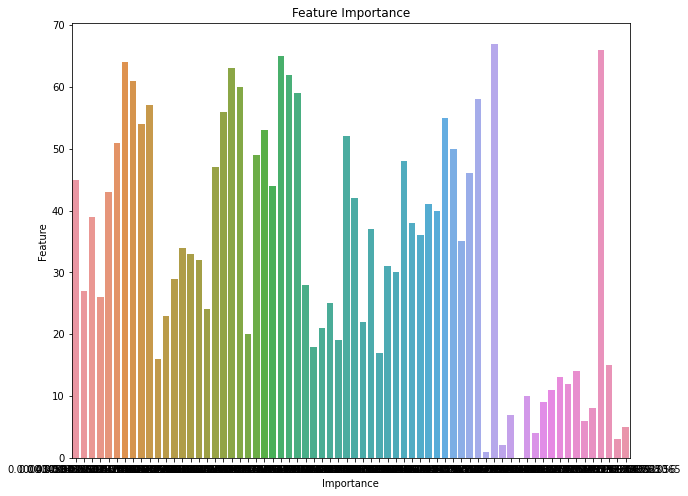

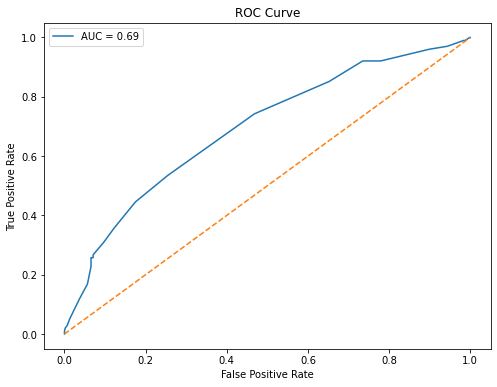

In [43]:
# confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, y_pred)

# feature importance plot 
plot_feature_importance(rf_clf, X_train)

# ROC curve plot 
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)

#### Plot for Tuned Random Forest

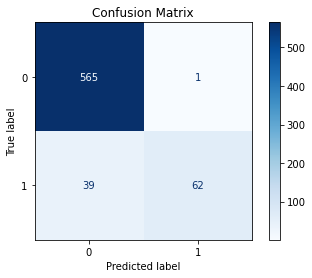

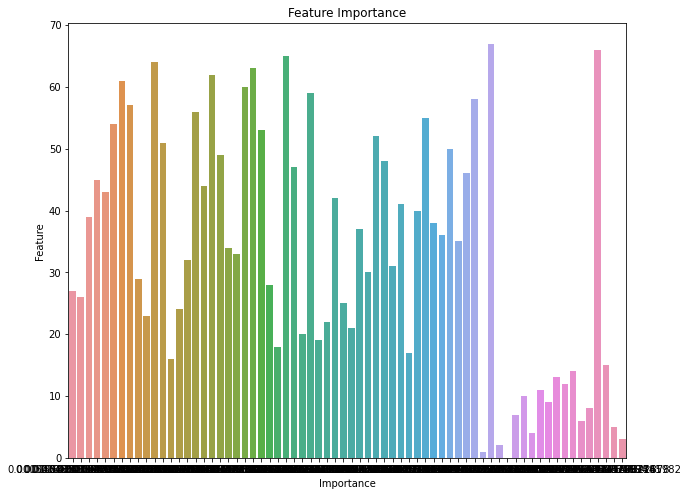

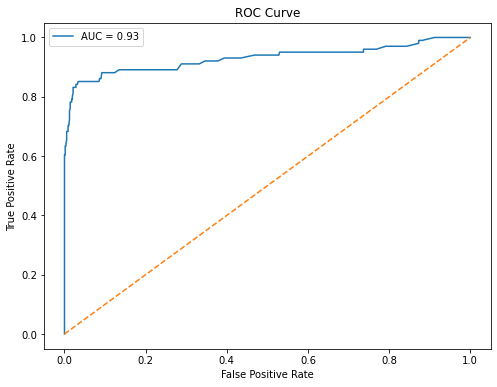

In [45]:
# confusion matrix plot
plot_confusion_matrix(y_test, y_pred)

# feature importance plot
plot_feature_importance(best_rf, X_train)

# ROC curve plot
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)